# Numerical Integration -- RK4

[RK4 method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) has been applied to force free spherical, symmetric, asymmetric top cases. Here are [some useful notes](https://www.calvin.edu/~scofield/courses/m231/materials/rungeKuttaFormulas.pdf) on multi-variable RK4 method.

--------------------------------

## Sanity checks for force-free motion (no external torque)

Spherical top ($I_{1}=I_{2}=I_{3}$):

- rotate about z-axis (in the space frame) --> steady rotation? __YES__
- rotate about x-axis (in the space frame) --> steady rotation? __YES__
- rotate about y-axis (in the space frame) --> steady rotation? __YES__
- rotate about random axis --> steady rotation? __YES__

## notes
- The stability of the RK4 method for this specific case has not been derived yet. Appropriate parameters, $\omega$'s and $\Delta{t}$, are chosen through trial-and-error. It would be very useful to obtain analytic expressions for our future works, especially when we have to deal with large sets of data.
- I said rotations were steady, if the plots of Euler angles (3-panel figure) showed steady behavior. We are looking for smoothness, not necessarily straightness, for example, when the system is rotating about more than one axis, the Euler angles don't evolve linearly.

-------------------

## Case 1. Spherical top

A rigid body with three equal principal moments of inertia, $I_{1}=I_{2}=I_{3}$, is called a spherical top. The force-free motion of a spherical top is trivial. Euler's equations become

\begin{align}
  \dot{\omega}_{1} = 0 \\
  \dot{\omega}_{2} = 0 \\
  \dot{\omega}_{3} = 0
\end{align}

and so each component of $\vec{\omega}$  is constant. 

Also, the components of $\vec{\omega}$ in the body frame are related to the Euler angles by

\begin{align}
  & \dot{\phi} = f_{\phi}\:(\theta, \psi;t) \\
  & \dot{\theta} = f_{\theta}\:(\psi;t) \\
  & \dot{\psi} = f_{\psi}\:(\theta, \psi; t)
\end{align}

where

\begin{align}
  & f_{\phi}\:(\theta, \psi;t) = \omega_{1}\csc{\theta}\sin{\psi} + \omega_{2}\csc{\theta}\cos{\psi} \\ 
  & f_{\theta}\:(\psi;t) = \omega_{1}\cos{\psi} - \omega_{2}\sin{\psi} \\
  & f_{\psi}\:(\theta, \psi;t) = -\omega_{1}\cot{\theta}\sin{\psi} - \omega_{2}\cot{\theta}\cos{\psi} + \omega_{3}
\end{align}

-----------------------

Now, we apply the RK4 numerical method at each time step to update the Euler angles.

\begin{align}
  & \phi^{n+1} = \phi^n + \frac{\Delta{t}}{2}\left(k_{n1}+2k_{n2}+2k_{n3}+k_{n4}\right) \\
  & \theta^{n+1} = \theta^n + \frac{\Delta{t}}{2}\left(l_{n1}+2l_{n2}+2l_{n3}+l_{n4}\right) \\
  & \psi^{n+1} = \psi^n + \frac{\Delta{t}}{2}\left(m_{n1}+2m_{n2}+2m_{n3}+m_{n4}\right)
\end{align}

where

\begin{align}
  & k_{n1} = f_\phi\left(\theta^n, \: \psi^n\right) \\
  & l_{n1} = f_\theta\left(\psi^n\right) \\
  & m_{n1} = f_\psi\left(\theta^n, \: \psi^n\right) \\
  & k_{n2} = f_\phi\left(\theta^n+\frac{\Delta{t}}{2}l_{n1}, \: \psi^n+\frac{\Delta{t}}{2}m_{n1}\right) \\
  & l_{n2} = f_\theta\left(\psi^n+\frac{\Delta{t}}{2}m_{n1}\right) \\
  & m_{n2} = f_\psi\left(\theta^n+\frac{\Delta{t}}{2}l_{n1}, \: \psi^n+\frac{\Delta{t}}{2}m_{n1}\right) \\
  & k_{n3} = f_\phi\left(\theta^n+\frac{\Delta{t}}{2}l_{n2}, \: \psi^n+\frac{\Delta{t}}{2}m_{n2}\right) \\
  & l_{n3} = f_\theta\left(\psi^n+\frac{\Delta{t}}{2}m_{n2}\right) \\
  & m_{n3} = f_\psi\left(\theta^n+\frac{\Delta{t}}l_{n2}, \: \psi^n+\frac{\Delta{t}}{2}m_{n2}\right) \\
  & k_{n4} = f_\phi\left(\theta^n+\Delta{t}\:l_{n3}, \: \psi^n+\Delta{t}\:m_{n3}\right) \\
  & l_{n4} = f_\theta\left(\psi^n+\Delta{t}\:m_{n3}\right) \\
  & m_{n4} = f_\psi\left(\theta^n+\Delta{t}\:l_{n3}, \: \psi^n+\Delta{t}\:m_{n3}\right)
\end{align}

In [1]:
%matplotlib notebook
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [18]:
# main parameters

# here the radius R, and I are arbirtrary
R = 10  
#I = 10
Np = 100   # number of points

# initalization
omega1 = 0.00
omega2 = 0.00
omega3 = 0.05 

Phi = np.zeros(Np)
Theta = np.zeros(Np)
Psi = np.zeros(Np)
Phi[0] = 0
Theta[0] = 0.00001   # the expression doesnt allow the initial theta to be zero
Psi[0] = 0

# technically we only need dt
t = np.linspace(0, 20*2*np.pi, Np)
dt = t[1]-t[0]

In [19]:
# other parameters
#tilt = 23.5*np.pi/180   # tilt angle

# meshgrids
lat0 = np.linspace(0, np.pi, Np)
lon0 = np.linspace(0, 2*np.pi, Np)
lat, lon = np.meshgrid(lat0, lon0)

# initial x,y,z
x0 = R*np.sin(lat)*np.cos(lon)
y0 = R*np.sin(lat)*np.sin(lon)
z0 = R*np.cos(lat)

# default axis
p0 = np.array([0, 0, R])
#p0, x0, y0, z0 = evolve(0, tilt, 0)

In [20]:
# updates the meshgrids using the rotation matix at each step
def evolve(phi, theta, psi):
    
    # rotation matrix -- euler angles
    rotMat = np.array([[np.cos(psi)*np.cos(phi)-np.cos(theta)*np.sin(phi)*np.sin(psi), np.cos(psi)*np.sin(phi)+np.cos(theta)*np.cos(phi)*np.sin(psi), np.sin(psi)*np.sin(theta)], \
                    [-np.sin(psi)*np.cos(phi)-np.cos(theta)*np.sin(phi)*np.cos(psi), -np.sin(psi)*np.sin(phi)+np.cos(theta)*np.cos(phi)*np.cos(psi), np.cos(psi)*np.sin(theta)], \
                    [np.sin(theta)*np.sin(phi), -np.sin(theta)*np.cos(phi), np.cos(theta)]])
    
    # rotate meshgrid
    xNew = np.zeros([Np,Np])
    yNew = np.zeros([Np,Np])
    zNew = np.zeros([Np,Np])
    for i in range(Np):
        for j in range(Np):
            xNew[i,j] = rotMat[0,0]*x0[i,j] + rotMat[0,1]*y0[i,j] + rotMat[0,2]*z0[i,j]
            yNew[i,j] = rotMat[1,0]*x0[i,j] + rotMat[1,1]*y0[i,j] + rotMat[1,2]*z0[i,j]
            zNew[i,j] = rotMat[2,0]*x0[i,j] + rotMat[2,1]*y0[i,j] + rotMat[2,2]*z0[i,j]
    
    # rotate axis
    pNew = np.dot(rotMat, p0)
    
    return pNew, xNew, yNew, zNew

In [21]:
def plotSphere(p, x, y, z):
    
    # evolve grids
    ax0.set_xlim(-1.3*R, 1.3*R)
    ax0.set_ylim(-1.3*R, 1.3*R)
    ax0.set_zlim(-1.3*R, 1.3*R)
    
    # highlighted strip to see the rotation/spin more easily
    N0 = int(Np/20)
    ax0.plot_surface(x[N0:], y[N0:], z[N0:], color='lightskyblue', alpha=0.8)
    ax0.plot_surface(x[:N0+1], y[:N0+1], z[:N0+1], color='mediumseagreen', alpha=0.8)

    # evolve axis
    ax0.plot([-1.3*p[0],-p[0]], [-1.3*p[1],-p[1]], [-1.3*p[2],-p[2]], color='darkgreen', linewidth=1)
    ax0.plot([-p[0],p[0]], [-p[1],p[1]], [-p[2],p[2]], color='darkgreen', linestyle='--', linewidth=1)
    ax0.plot([p[0],1.3*p[0]], [p[1],1.3*p[1]], [p[2],1.3*p[2]], color='darkgreen', linewidth=1)
    
    return        

In [22]:
# phi, theta, psi functions

def fPhi(theta, psi):
    newPhi0 = 1/np.sin(theta)*(omega1*np.sin(psi) + omega2*np.cos(psi))
    return newPhi0
    
def fTheta(psi):
    newTheta0 = omega1*np.cos(psi) - omega2*np.sin(psi)
    return newTheta0

def fPsi(theta, psi):
    newPsi0 = -1/np.tan(theta)*(omega1*np.sin(psi) + omega2*np.cos(psi)) + omega3
    return newPsi0    

In [23]:
# RK4 method

def rk4():
    
    # calculate using different slopes
    k1 = fPhi(theta, psi)
    l1 = fTheta(psi)
    m1 = fPsi(theta, psi)

    k2 = fPhi(theta+dt/2*l1, psi+dt/2*m1)
    l2 = fTheta(psi+dt/2*m1)
    m2 = fPsi(theta+dt/2*l1, psi+dt/2*m1)
    
    k3 = fPhi(theta+dt/2*l2, psi+dt/2*m2)
    l3 = fTheta(psi+dt/2*m2)
    m3 = fPsi(theta+dt/2*l2, psi+dt/2*m2)

    k4 = fPhi(theta+dt*l3, psi+dt*m3)
    l4 = fTheta(psi+dt*m3)
    m4 = fPsi(theta+dt*l3, psi+dt*m3)
    
    # now average them
    newPhi = phi + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    newTheta = theta + dt/6*(l1 + 2*l2 + 2*l3 + l4)
    newPsi = psi + dt/6*(m1 + 2*m2 + 2*m3 + m4)
    
    return newPhi, newTheta, newPsi

In [24]:
# evolve with time

for n in range(Np-1):   # notice Np-1 due to the nature of the RK4 method
    
    phi = Phi[n]
    theta = Theta[n]
    psi = Psi[n]
    
    newPhi, newTheta, newPsi = rk4()
    
    Phi[n+1] = newPhi
    Theta[n+1] = newTheta
    Psi[n+1] = newPsi   

<IPython.core.display.Javascript object>


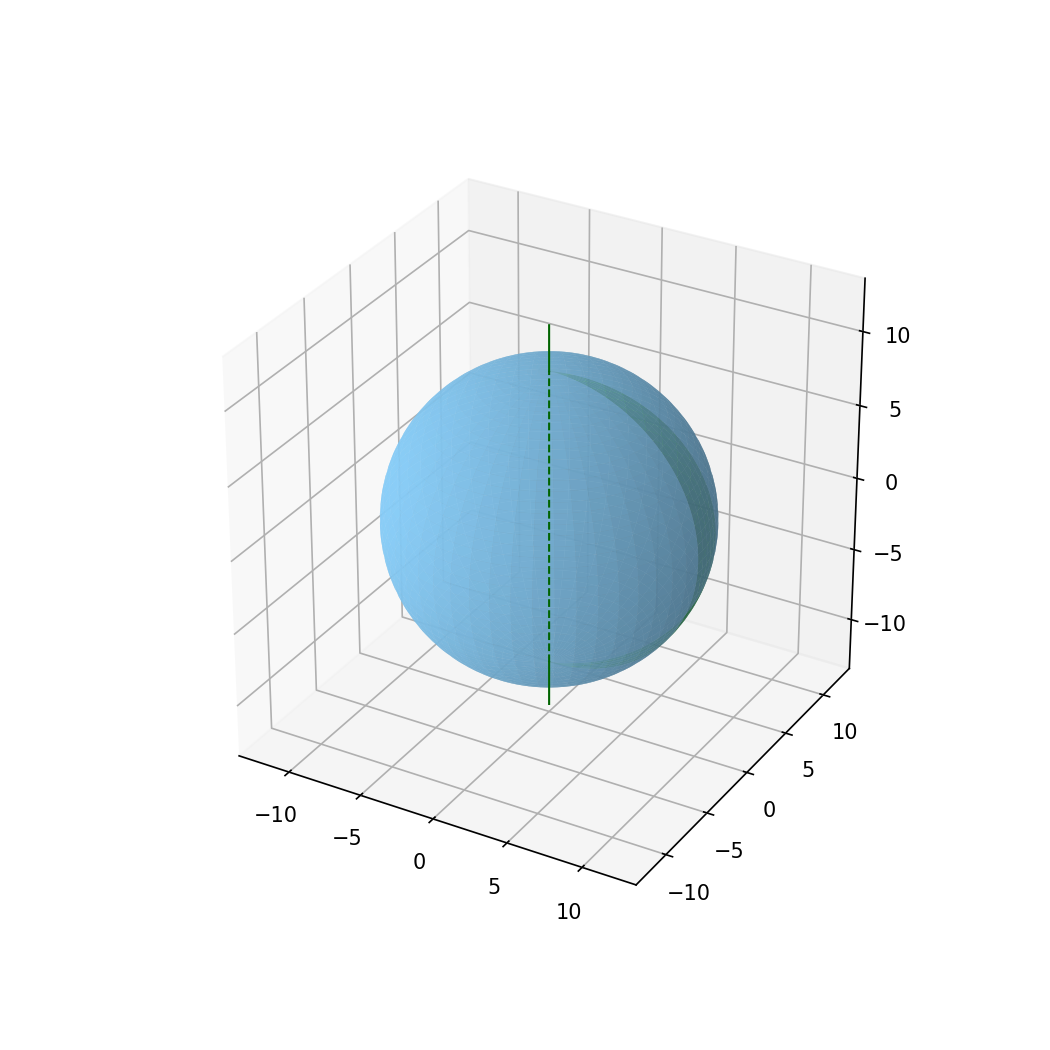

<IPython.core.display.Javascript object>


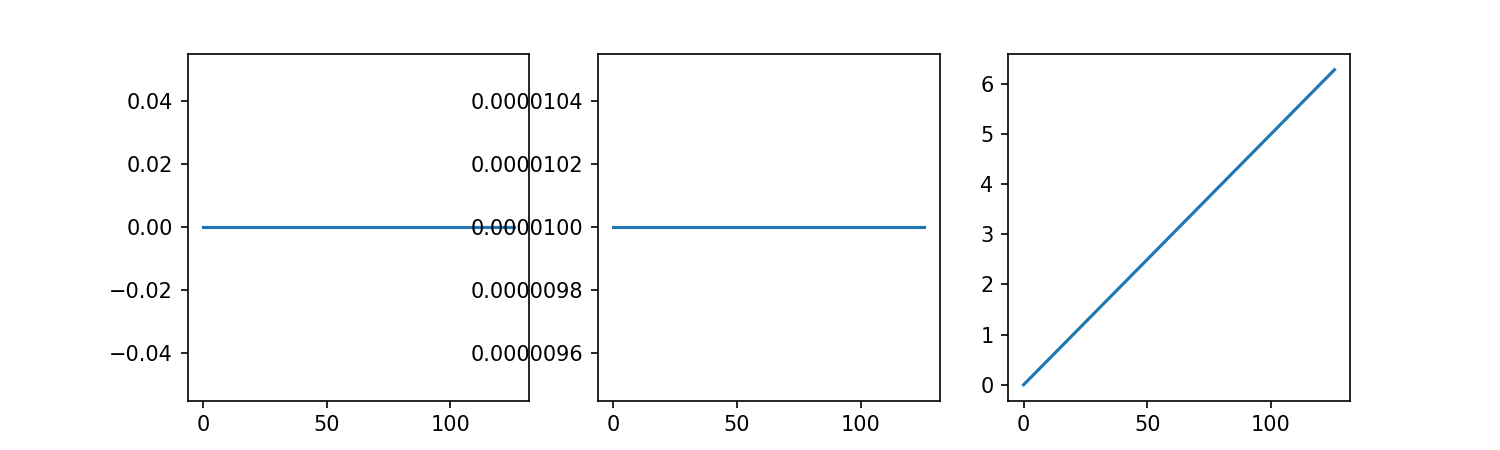

In [25]:
# prepare a figure
fig0 = plt.figure(figsize=(7,7))
ax0 =fig0.add_subplot(111, projection='3d')

for n in range(Np):
    
    # evolve
    p, x, y, z = evolve(Phi[n], Theta[n], Psi[n])
    
    # update figure
    ax0.clear()
    plotSphere(p, x, y, z)
    fig0.canvas.draw()
    
# fig1 shows euler angles

fig1 = plt.figure(figsize=(10,3))
#ax0 =fig0.add_subplot(111, projection='3d')
ax0 =fig1.add_subplot(131)
ax1 =fig1.add_subplot(132)
ax2 =fig1.add_subplot(133)

ax0.plot(t,Phi)
ax1.plot(t,Theta)
ax2.plot(t,Psi)